In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tickers = [
    "DLF.BO", "LODHA.NS", "GODREJPROP.NS", "OBEROIRLTY.BO", "PHOENIXLTD.BO",
    "PRESTIGE.NS", "BRIGADE.BO", "NBCC.NS", "ANANTRAJ.BO", "SIGNATURE.NS",
    "EMBASSY.BO", "BIRET.BO", "MINDSPACE.BO", "NXST.BO"
]

reits = tickers[-4:]
stocks = tickers[:-4]

data = yf.download(tickers + ["^NSEI"], start='2020-01-01', end='2025-03-24', progress=True)['Close']

data = data.dropna(axis=1, how='all')
data = data.ffill().dropna()
returns = data.pct_change().dropna()

metrics = pd.DataFrame(index=returns.columns, columns=['Average Return', 'Beta', 'Type'])
metrics = metrics.drop("^NSEI", errors='ignore')

market_returns = returns["^NSEI"]
for ticker in metrics.index:
    if ticker == "^NSEI":
        continue
        
    stock_returns = returns[ticker]
    avg_return = stock_returns.mean() * 252
    
    # Calculate beta
    covariance = np.cov(stock_returns, market_returns)
    beta = covariance[0, 1] / covariance[1, 1]
    
    asset_type = "REIT" if ticker in reits else "Stock"
    metrics.loc[ticker] = [avg_return, beta, asset_type]

metrics[['Average Return', 'Beta']] = metrics[['Average Return', 'Beta']].astype(float)

[*********************100%***********************]  15 of 15 completed


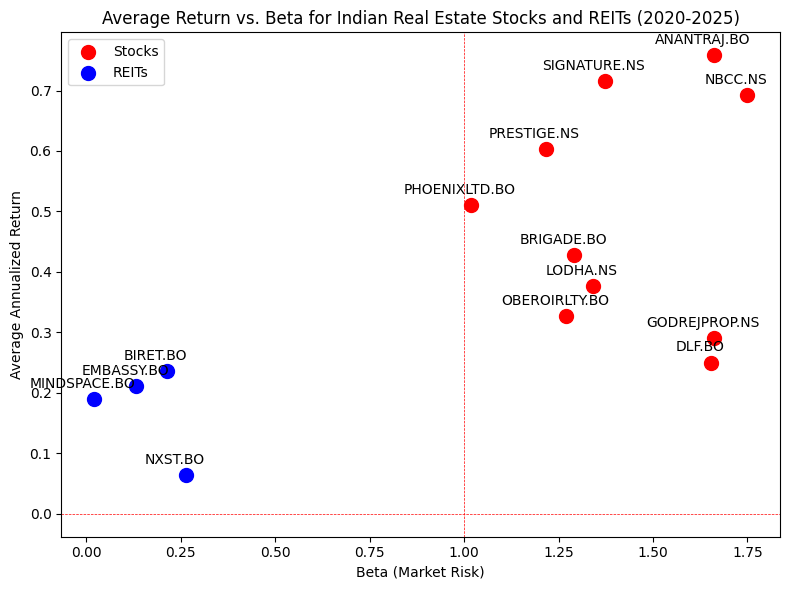


Performance Metrics:
               Average Return      Beta   Type
Ticker                                        
ANANTRAJ.BO          0.758301  1.660652  Stock
SIGNATURE.NS         0.715447  1.371646  Stock
NBCC.NS              0.693022  1.749727  Stock
PRESTIGE.NS          0.603291  1.215551  Stock
PHOENIXLTD.BO        0.510110  1.016852  Stock
BRIGADE.BO           0.428207  1.291974  Stock
LODHA.NS             0.376842  1.340718  Stock
OBEROIRLTY.BO        0.327678  1.269789  Stock
GODREJPROP.NS        0.291074  1.660953  Stock
DLF.BO               0.250071  1.653938  Stock
BIRET.BO             0.235766  0.212040   REIT
EMBASSY.BO           0.210565  0.131581   REIT
MINDSPACE.BO         0.190261  0.019780   REIT
NXST.BO              0.064073  0.263071   REIT


In [ ]:
plt.figure(figsize=(8, 6))

stock_data = metrics[metrics['Type'] == 'Stock']
plt.scatter(stock_data['Beta'], stock_data['Average Return'], 
            color='red', s=100, label='Stocks')

reit_data = metrics[metrics['Type'] == 'REIT']
plt.scatter(reit_data['Beta'], reit_data['Average Return'], 
            color='blue', s=100, label='REITs')

for ticker in metrics.index:
    plt.annotate(ticker, 
                 (metrics.loc[ticker, 'Beta'], metrics.loc[ticker, 'Average Return']),
                 textcoords="offset points", 
                 xytext=(-8,8), 
                 ha='center')

plt.title('Average Return vs. Beta for Indian Real Estate Stocks and REITs (2020-2025)')
plt.xlabel('Beta (Market Risk)')
plt.ylabel('Average Annualized Return')
# plt.grid(True)

plt.axhline(0, color='red', linestyle='--', linewidth=0.5)
plt.axvline(1, color='red', linestyle='--', linewidth=0.5)

plt.legend()
plt.tight_layout()
plt.show()

print("\nPerformance Metrics:")
print(metrics.sort_values('Average Return', ascending=False))